In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


## Load Dataset and Add Labels



In [2]:
# Load datasets
true_news_path = '/kaggle/input/fake-and-real-news-dataset/True.csv'
true_news = pd.read_csv(true_news_path)
true_news['label'] = 'real'

# Display the first few rows of  dataset
true_news.head()


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [3]:
fake_news_path = '/kaggle/input/fake-and-real-news-dataset/Fake.csv'
fake_news = pd.read_csv(fake_news_path)
fake_news['label'] = 'fake'
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


## Combining and Shuffling News Data


In [4]:
# Combine the DataFrames
news_data = pd.concat([true_news, fake_news])

# Shuffle the combined DataFrame to mix real and fake news
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the combined DataFrame
news_data.head()


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",fake


## Checking for Null Values in news_data DataFrame


In [5]:
news_data.isnull()


,title,text,subject,date,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
44893,False,False,False,False,False
44894,False,False,False,False,False
44895,False,False,False,False,False
44896,False,False,False,False,False


## Downloading and Using NLTK WordNet Resource


In [6]:
import nltk
import subprocess

# Download and unzip WordNet
try:
    nltk.data.find('corpora/wordnet')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# import the NLTK resources as usual
from nltk.corpus import wordnet

# Example usage of WordNet
syns = wordnet.synsets("car")
print(syns)


[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

## Text Preprocessing Setup


In [7]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Lowercase
    return text

# Tokenization, stop words removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


## Applying Text Cleaning and Preprocessing


In [8]:
# Apply text cleaning and preprocessing
news_data['clean_text'] = news_data['text'].apply(clean_text)
news_data['processed_text'] = news_data['clean_text'].apply(preprocess_text)

# Display the first few rows of the processed text
news_data[['text', 'clean_text', 'processed_text', 'label']].head()


,text,clean_text,processed_text,label
0,"Donald Trump s White House is in chaos, and th...",donald trump s white house is in chaos and the...,donald trump white house chaos trying cover ru...,fake
1,Now that Donald Trump is the presumptive GOP n...,now that donald trump is the presumptive gop n...,donald trump presumptive gop nominee time reme...,fake
2,Mike Pence is a huge homophobe. He supports ex...,mike pence is a huge homophobe he supports exg...,mike penny huge homophobe support exgay conver...,fake
3,SAN FRANCISCO (Reuters) - California Attorney ...,san francisco reuters california attorney gen...,san francisco reuters california attorney gene...,real
4,Twisted reasoning is all that comes from Pelos...,twisted reasoning is all that comes from pelos...,twisted reasoning come pelosi day especially p...,fake


# Checking Overall Class Distribution


label
fake    23481
real    21417
Name: count, dtype: int64


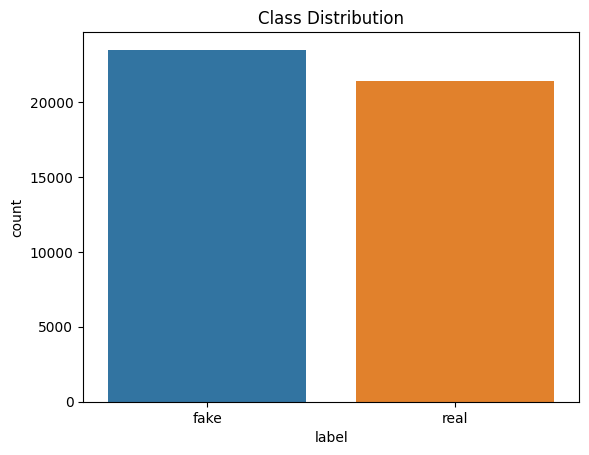

In [10]:
import seaborn as sns

class_counts = news_data['label'].value_counts()
print(class_counts)

# Plotting the class distribution
sns.countplot(x='label', data=news_data)
plt.title('Class Distribution')
plt.show()

## Generating Word Cloud for Real & Fake News


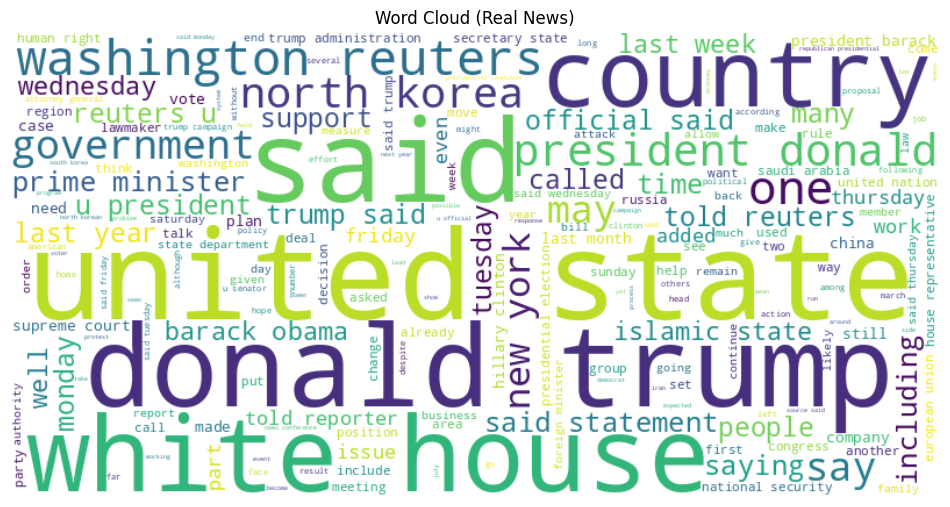

In [11]:
# Function to calculate and plot the frequency of words for each label
def plot_word_cloud(label, label_name):
    # Filter the data for the given label
    label_data = news_data[news_data['label'] == label]

    # Combine all processed text into one string
    all_text = ' '.join(label_data['processed_text'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud ({label_name} News)')
    plt.show()

# Plot word clouds for each label
plot_word_cloud('real', 'Real')


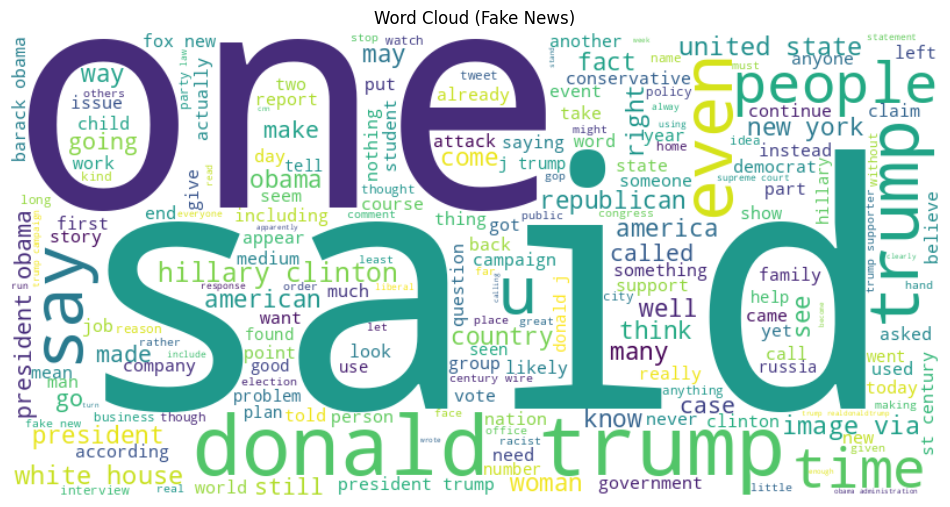

In [13]:
plot_word_cloud('fake', 'Fake')

## Applying Sentiment Analysis Using VADER


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply sentiment analysis
news_data['sentiment_scores'] = news_data['processed_text'].apply(get_sentiment_scores)

# Separate the sentiment scores into individual columns
sentiment_df = pd.json_normalize(news_data['sentiment_scores'])
news_data = pd.concat([news_data, sentiment_df], axis=1)

# Display the first few rows with sentiment scores
news_data[['text', 'clean_text', 'processed_text', 'label', 'pos', 'neu', 'neg', 'compound']].head()


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,text,clean_text,processed_text,label,pos,neu,neg,compound
0,"Donald Trump s White House is in chaos, and th...",donald trump s white house is in chaos and the...,donald trump white house chaos trying cover ru...,fake,0.114,0.612,0.274,-0.9872
1,Now that Donald Trump is the presumptive GOP n...,now that donald trump is the presumptive gop n...,donald trump presumptive gop nominee time reme...,fake,0.157,0.686,0.158,-0.5224
2,Mike Pence is a huge homophobe. He supports ex...,mike pence is a huge homophobe he supports exg...,mike penny huge homophobe support exgay conver...,fake,0.133,0.737,0.130,0.1677
3,SAN FRANCISCO (Reuters) - California Attorney ...,san francisco reuters california attorney gen...,san francisco reuters california attorney gene...,real,0.055,0.945,0.000,0.2960
4,Twisted reasoning is all that comes from Pelos...,twisted reasoning is all that comes from pelos...,twisted reasoning come pelosi day especially p...,fake,0.198,0.718,0.084,0.8832


## Calculating Descriptive Statistics for Sentiment Scores


In [15]:

mean_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].mean()
std_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].std()

print("Mean sentiment scores:")
print(mean_scores)
print("\nStandard deviation of sentiment scores:")
print(std_scores)

Mean sentiment scores:
            pos       neu       neg  compound
label                                        
fake   0.143604  0.688385  0.141145 -0.044159
real   0.128814  0.755969  0.115167  0.097174

Standard deviation of sentiment scores:
            pos       neu       neg  compound
label                                        
fake   0.079457  0.147744  0.083774  0.837716
real   0.062649  0.082271  0.074882  0.823078


## Plotting Mean Sentiment Scores by Label


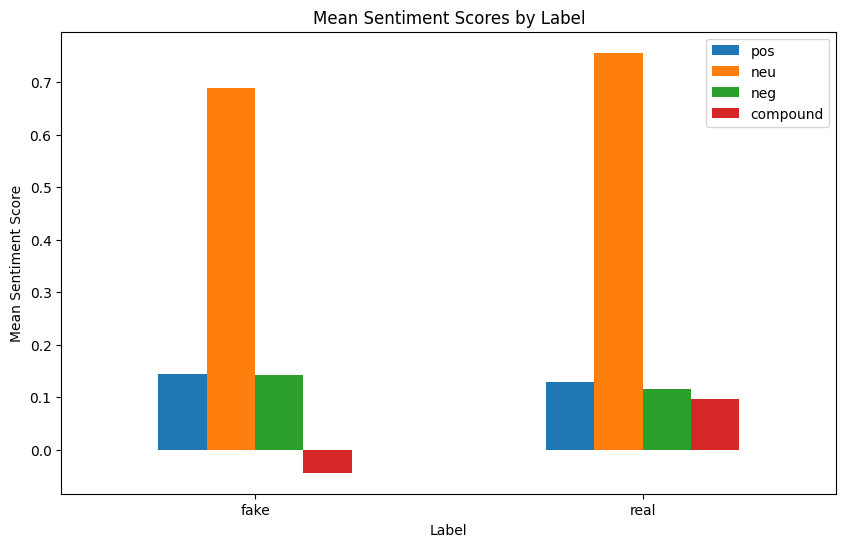

In [16]:
import matplotlib.pyplot as plt


# Plot mean sentiment scores
plt.figure(figsize=(10, 6))
mean_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].mean()
mean_scores.plot(kind='bar', ax=plt.gca())
plt.title('Mean Sentiment Scores by Label')
plt.xlabel('Label')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=0)
plt.show()


### Mean Sentiment Scores by Label

The bar plot below shows the mean sentiment scores for "fake" and "real" news:

- **Fake News**:
  - Positive: 0.144
  - Neutral: 0.688
  - Negative: 0.141
  - Compound: -0.044

- **Real News**:
  - Positive: 0.129
  - Neutral: 0.756
  - Negative: 0.115
  - Compound: 0.097

The plot indicates that real news tends to have a more positive sentiment on average compared to fake news.


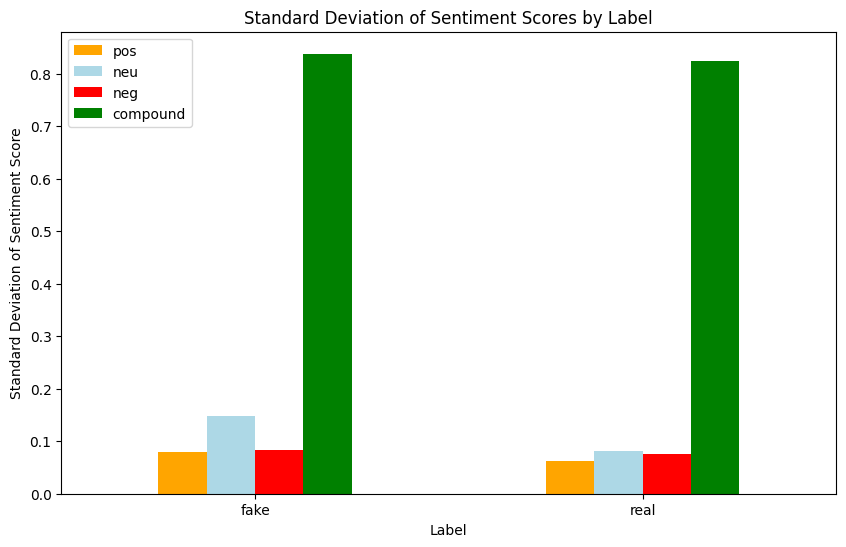

In [17]:
# Plot standard deviation of sentiment scores
plt.figure(figsize=(10, 6))
std_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].std()
std_scores.plot(kind='bar', ax=plt.gca(), color=['orange', 'lightblue', 'red', 'green'])
plt.title('Standard Deviation of Sentiment Scores by Label')
plt.xlabel('Label')
plt.ylabel('Standard Deviation of Sentiment Score')
plt.xticks(rotation=0)
plt.show()

### Standard Deviation of Sentiment Scores by Label

The bar plot below shows the standard deviation of sentiment scores for "fake" and "real" news:

- **Fake News**:
  - Positive: 0.079
  - Neutral: 0.148
  - Negative: 0.084
  - Compound: 0.838

- **Real News**:
  - Positive: 0.063
  - Neutral: 0.082
  - Negative: 0.075
  - Compound: 0.823

The plot indicates that there is more variability in the sentiment of fake news compared to real news, suggesting that fake news articles are more inconsistent in their sentiment.

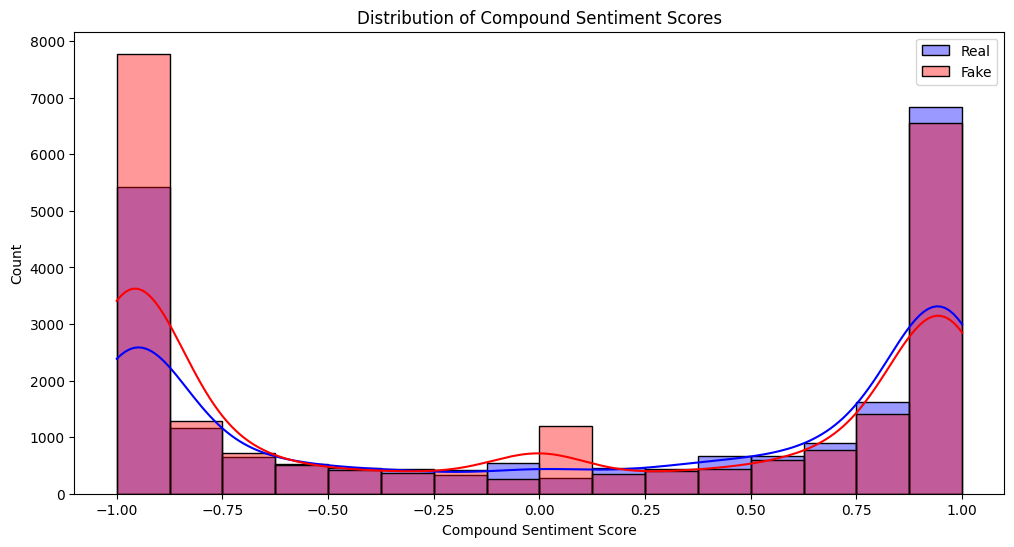

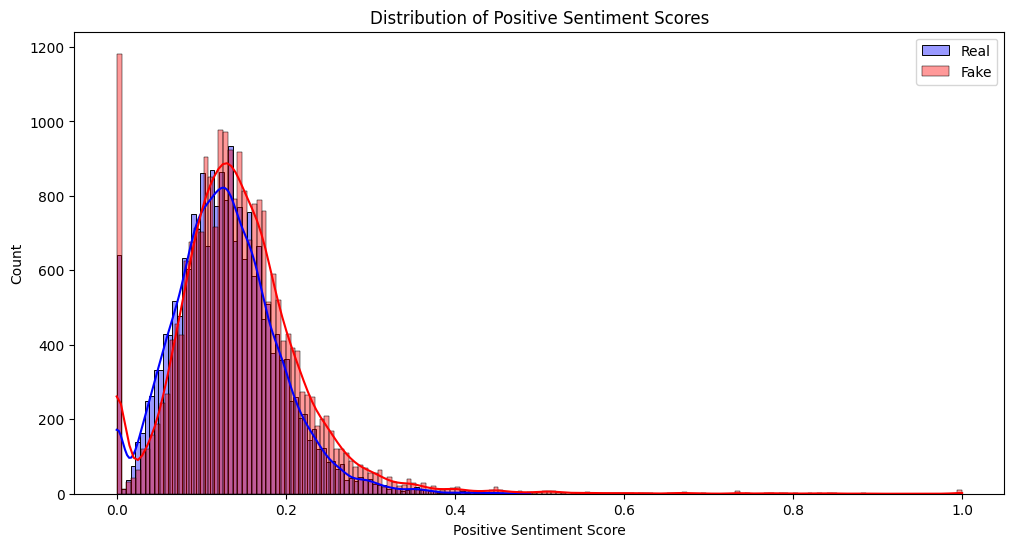

In [18]:
plt.figure(figsize=(12, 6))

# Histogram for compound score
sns.histplot(news_data[news_data['label'] == 'real']['compound'], color='blue', label='Real', kde=True, alpha=0.4)
sns.histplot(news_data[news_data['label'] == 'fake']['compound'], color='red', label='Fake', kde=True, alpha=0.4)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

# Histogram for positive score
sns.histplot(news_data[news_data['label'] == 'real']['pos'], color='blue', label='Real', kde=True, alpha=0.4)
sns.histplot(news_data[news_data['label'] == 'fake']['pos'], color='red', label='Fake', kde=True, alpha=0.4)
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.legend()
plt.show()


### Sentiment Analysis Explanation

In this project, we use VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis to analyze the sentiment of news articles. Here’s an explanation of the key concepts and how we interpret the results:

#### VADER Sentiment Metrics

VADER provides four sentiment metrics:

1. **Positive (`pos`)**: Proportion of positive sentiment in the text.
2. **Negative (`neg`)**: Proportion of negative sentiment in the text.
3. **Neutral (`neu`)**: Proportion of neutral sentiment in the text.
4. **Compound (`compound`)**: A normalized, weighted composite score that summarizes the overall sentiment.

#### Understanding the Compound Score

- **Range**: The `compound` score ranges from -1 to 1.
  - **-1** indicates the most negative sentiment.
  - **1** indicates the most positive sentiment.
  - **0** indicates neutral sentiment.

- **Calculation**: The `compound` score is calculated by summing the valence scores of each word in the text and normalizing the result to ensure it stays within the range of -1 to 1. The normalization formula is:

![Compound Formula](https://quicklatex.com/cache3/5d/ql_813779ad1ef3e3391cc0f3c09e94c95d_l3.png)


  where alpha is a normalization constant.

- **Interpretation**:
  - **Positive Sentiment**: A `compound` score greater than 0 indicates a positive sentiment.
  - **Negative Sentiment**: A `compound` score less than 0 indicates a negative sentiment.
  - **Neutral Sentiment**: A `compound` score around 0 indicates a neutral sentiment.

In [19]:
from scipy.stats import ttest_ind

# Statistical test
real_compound = news_data[news_data['label'] == 'real']['compound']
fake_compound = news_data[news_data['label'] == 'fake']['compound']
t_stat, p_value = ttest_ind(real_compound, fake_compound)

print(f'T-test for compound score: t-statistic = {t_stat}, p-value = {p_value}')

real_pos = news_data[news_data['label'] == 'real']['pos']
fake_pos = news_data[news_data['label'] == 'fake']['pos']
t_stat, p_value = ttest_ind(real_pos, fake_pos)

print(f'T-test for positive score: t-statistic = {t_stat}, p-value = {p_value}')

T-test for compound score: t-statistic = 18.004883957507644, p-value = 3.2049086868818336e-72
T-test for positive score: t-statistic = -21.760488476436613, p-value = 1.9088774825290567e-104


### Statistical Analysis Explanation

To explore the correlation between sentiment and the authenticity of news articles (real vs. fake), we conducted independent two-sample t-tests. This statistical test helps us determine whether there are significant differences between the sentiments of real and fake news articles.

#### Independent Two-Sample T-Test

The independent two-sample t-test compares the means of two independent groups to see if they are significantly different from each other.

1. **Null Hypothesis (H0)**: There is no significant difference between the means of the two groups.
2. **Alternative Hypothesis (H1)**: There is a significant difference between the means of the two groups.


### Findings from Sentiment Analysis

Based on the results of the independent two-sample t-tests conducted on the sentiment scores of real and fake news articles:

#### Compound Score Analysis

- **T-test Results:**
  - **T-statistic:** 18.0049
  - **P-value:** 3.2049e-72

- **Interpretation:**
  - The t-statistic of 18.0049 indicates a substantial difference in the overall sentiment (`compound` score) between real and fake news articles.
  - The very low p-value (3.2049e-72) suggests that this difference is statistically significant.
  - Therefore, we reject the null hypothesis and conclude that there is a significant difference in overall sentiment between real and fake news articles.

#### Positive Sentiment Score Analysis

- **T-test Results:**
  - **T-statistic:** -21.7605
  - **P-value:** 1.9089e-104

- **Interpretation:**
  - The t-statistic of -21.7605 indicates a significant difference in positive sentiment (`pos` score) between real and fake news articles.
  - The extremely low p-value (1.9089e-104) confirms that this difference is statistically significant.
  - Hence, we reject the null hypothesis and conclude that there is a significant difference in positive sentiment between real and fake news articles.

### Conclusion

The results from both t-tests strongly indicate that real and fake news articles exhibit significant differences in sentiment. Specifically:

- Real news tends to have distinct overall sentiment compared to fake news.
- Positive sentiment is significantly different between real and fake news articles.

These findings underscore the potential of sentiment analysis in distinguishing between real and fake news based on their sentiment characteristics.


## Data Preprocessing and Splitting

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(news_data['processed_text']).toarray()
y = news_data['label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Evaluation with Cross-Validation and Test Set


Model: Logistic Regression
Cross-Validated Accuracy: 0.9864970441840686


Test Set Evaluation for Logistic Regression
Accuracy: 0.9867483296213808




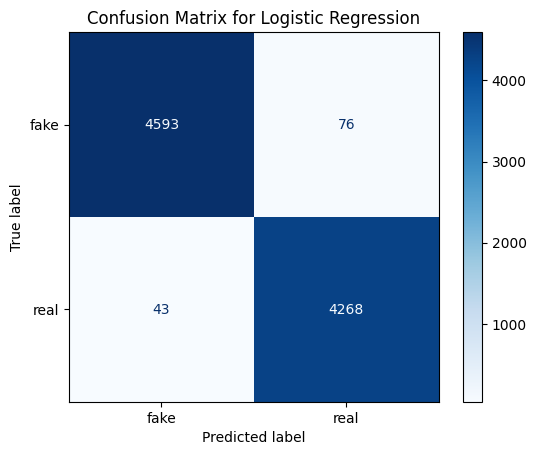



Model: Random Forest
Cross-Validated Accuracy: 0.9967982820734553


Test Set Evaluation for Random Forest
Accuracy: 0.9971046770601336




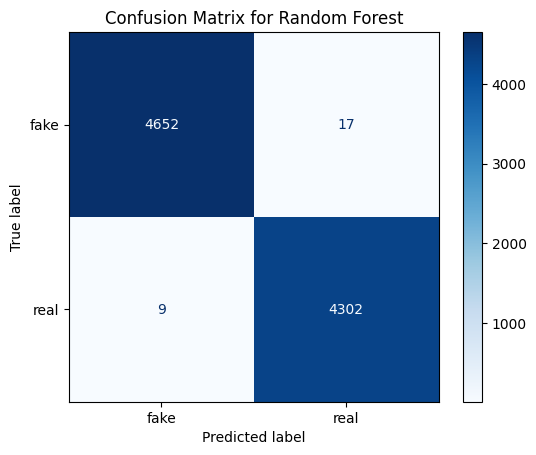



Model: Naive Bayes
Cross-Validated Accuracy: 0.9325966221284044


Test Set Evaluation for Naive Bayes
Accuracy: 0.9293986636971047




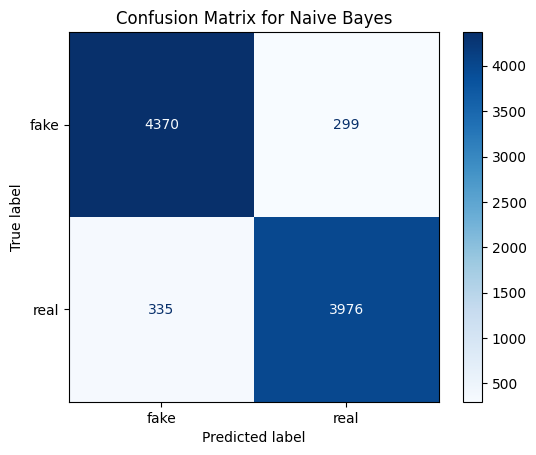

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np



# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Function to perform cross-validation and evaluate model
def evaluate_model_with_cv(model, X_train, y_train, model_name):
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Print cross-validated accuracy
    print(f"Model: {model_name}")
    print(f"Cross-Validated Accuracy: {np.mean(scores)}")
    print("\n")

    # Fit model on the full training data and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate on test set
    accuracy = accuracy_score(y_test, y_pred)

    # Print test set metrics
    print(f"Test Set Evaluation for {model_name}")
    print(f"Accuracy: {accuracy}")
    print("\n")

    # Plot confusion matrix for the test set
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\n")

# Evaluate each model with cross-validation and on the test set
for model_name, model in models.items():
    evaluate_model_with_cv(model, X_train, y_train, model_name)
